In [ ]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/Colab Notebooks/opencv/imagenes/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.path.dirname(__file__) + "/"

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (8, 5.0) # this controls figure size in the notebook


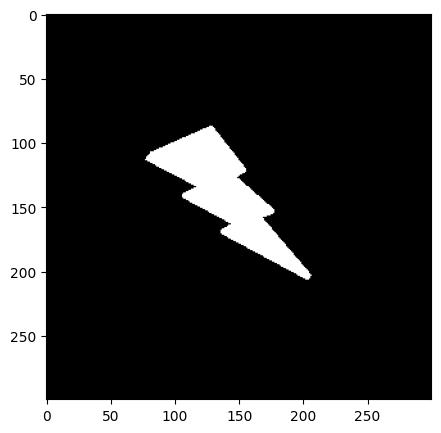

In [ ]:
imgc = cv.imread(data_dir + "rayo.png")
img = cv.cvtColor(imgc, cv.COLOR_BGR2GRAY)
ret,th = cv.threshold(img,127,255,0)
plt.imshow(th, cmap="gray")

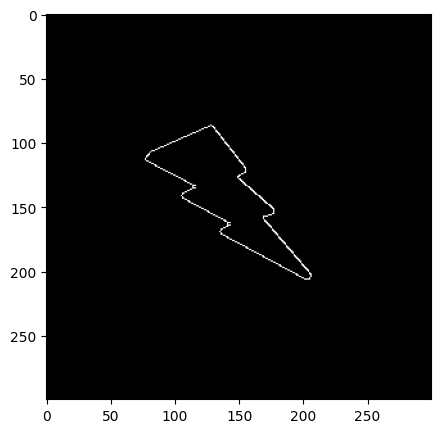

In [ ]:
umbral_minimo = 50
umbral_maximo = 100
cn = cv.Canny(th, umbral_minimo, umbral_maximo)
plt.imshow(cn, cmap="gray")

1
Centro: 139, 139
Área: 4933.5  Perímetro: 435.91377425193787


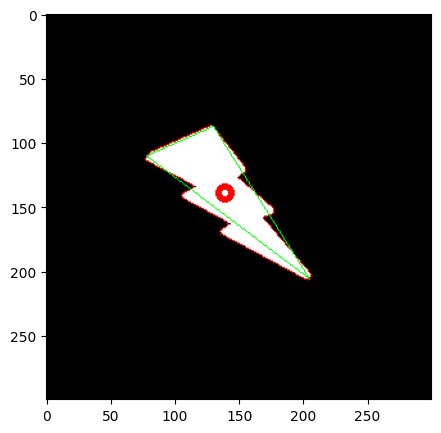

In [ ]:
1
contornos, jerarquia = cv.findContours(cn.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
cnt = contornos[0]
M = cv.moments(cnt)
if M['m00'] != 0:
  cx = int(M["m10"]/M['m00'])
  cy = int(M["m01"]/M['m00'])
  print(f"Centro: {cx}, {cy}")
  cv.circle(imgc, (cx, cy), 5, (255, 0, 0), 2)
area = cv.contourArea(cnt)
perimetro = cv.arcLength(cnt, True)
print(f"Área: {area}  Perímetro: {perimetro}")

approx = cv.approxPolyDP(cnt, 0.1*perimetro, True )
cv.drawContours(imgc, [approx], -1, (0,255,0), 1)
plt.imshow(imgc)




